In [44]:
import numpy as np
import getdist as gd
import matplotlib.pyplot as plt
import pickle as pk
from IPython.display import Latex

import os
import sys
sys.path.append('../kl_tools/')

import basis
import cube
import intensity
import likelihood
import mcmc
import parameters
from parameters import Pars
import priors
import utils
import velocity
from DataSimulator import DataSimulator
from likelihood import LogLikelihood_Roman
import getdist
from getdist import plots, MCSamples
# new modules
from spectrum import Spectrum

In [24]:
datadir = "/Users/jiachuanxu/Workspace/KL_measurement/kl-tools/tests/test-mcmc-run"
slitspec = datadir+"/test_mcmc_slitspec_noise_higherSNR"
grismspec = datadir+"/test_mcmc_highR_grismspec_noise"

### slit spec
with open(slitspec+"/test-mcmc-sampler.pkl",'rb') as f:
    slitspec_sampler = pk.load(f)
    slitspec_chain = slitspec_sampler.get_chain(flat=True)
with open(slitspec+"/test-mcmc-truth.pkl", 'rb') as f:
    slitspec_truth = pk.load(f)

### grism spec
with open(grismspec+"/test-mcmc-sampler.pkl", 'rb') as f:
    grismspec_sampler = pk.load(f)
    grismspec_chain = grismspec_sampler.get_chain(flat=True)
with open(grismspec+"/test-mcmc-truth.pkl", 'rb') as f:
    grismspec_truth = pk.load(f)

In [25]:
names = ['g1', 'g2', 'theta_int', 'sini', 'v0', 'vcirc', 'hlr']
labels= [r'g_1', r'g_2', r'\theta_{int}', r'sin(i)', r'v_0', r'v_{circ}', r'r_{hlr}']

mks = {}
for k,v1, v2 in zip(names, slitspec_truth, grismspec_truth):
    mks[k]=v1
    print(f'{k}: {v1} / {v2}')

g1: 0.0 / 0.0
g2: 0.0 / 0.0
theta_int: 0.0 / 0.0
sini: 0.5 / 0.5
v0: 0.0 / 0.0
vcirc: 200.0 / 200.0
hlr: 0.5 / 0.5


In [40]:
sample_slit = gd.mcsamples.MCSamples(samples=slitspec_chain, 
                                     names=names, 
                                    labels=labels, label='Slit Spec (R=9220)',
                                    )
sample_slit.removeBurn(0.3)
sample_grism = gd.mcsamples.MCSamples(samples=grismspec_chain, 
                                     names=names, 
                                    labels=labels, label='Grism Spec (R=9220)',
                                     )
sample_grism.removeBurn(0.3)

Removed no burn in
Removed no burn in


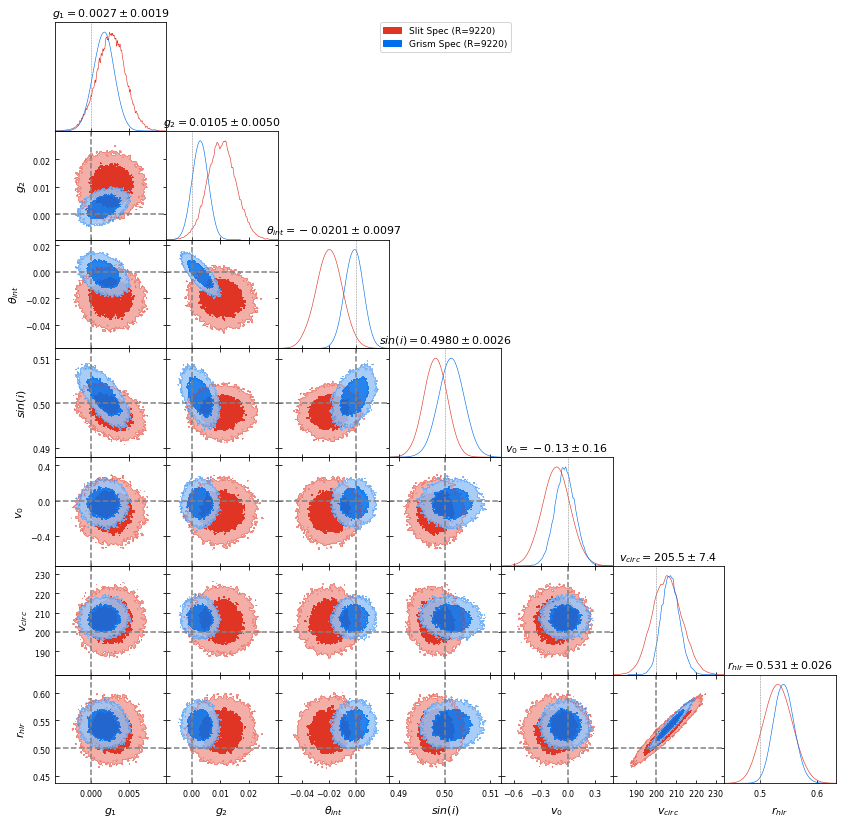

In [41]:
g = plots.get_subplot_plotter()
g.settings.title_limit_fontsize = 14
g.triangle_plot([sample_slit, sample_grism], 
                filled=True, title_limit=1,
                labels=['slit', 'grism'],
               markers=mks, marker_args={'lw':1.5,'ls':'--'},
               )

In [48]:
print(sample_slit.getTable().tableTex())

\begin{tabular} { l  c}

 Parameter &  95\% limits\\
\hline
{\boldmath$g_1            $} & $0.0027^{+0.0036}_{-0.0037}$\\

{\boldmath$g_2            $} & $0.0105^{+0.0099}_{-0.0098}$\\

{\boldmath$\theta_{int}   $} & $-0.020^{+0.019}_{-0.019}  $\\

{\boldmath$sin(i)         $} & $0.4980^{+0.0051}_{-0.0051}$\\

{\boldmath$v_0            $} & $-0.13^{+0.31}_{-0.31}     $\\

{\boldmath$v_{circ}       $} & $205^{+15}_{-14}           $\\

{\boldmath$r_{hlr}        $} & $0.531^{+0.051}_{-0.049}   $\\
\hline
\end{tabular}


In [51]:
print(sample_grism.getTable().tableTex())

\begin{tabular} { l  c}

 Parameter &  95\% limits\\
\hline
{\boldmath$g_1            $} & $0.0017^{+0.0027}_{-0.0027}$\\

{\boldmath$g_2            $} & $0.0029^{+0.0055}_{-0.0055}$\\

{\boldmath$\theta_{int}   $} & $-0.002^{+0.013}_{-0.014}  $\\

{\boldmath$sin(i)         $} & $0.5015^{+0.0055}_{-0.0055}$\\

{\boldmath$v_0            $} & $-0.03^{+0.23}_{-0.22}     $\\

{\boldmath$v_{circ}       $} & $207.2^{+9.2}_{-8.5}       $\\

{\boldmath$r_{hlr}        $} & $0.542^{+0.037}_{-0.034}   $\\
\hline
\end{tabular}
